Setting up the Kaggle Credentials

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'Enter your username'
os.environ['KAGGLE_KEY'] = 'Enter your key'


Downloading and Unzipping the Dataset

In [ ]:
!kaggle datasets download -d farzadnekouei/trash-type-image-dataset
!unzip -q trash-type-image-dataset.zip -d /content/waste_data


Dataset URL: https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset
License(s): unknown
trash-type-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
replace /content/waste_data/TrashType_Image_Dataset/cardboard/cardboard_001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


Loading and Preparing the Data

In [ ]:
# STEP 3 (Corrected): Load and prepare the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_path = "/content/waste_data/TrashType_Image_Dataset"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


Building the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.2296 - loss: 1.9134 - val_accuracy: 0.3559 - val_loss: 1.5591
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.3771 - loss: 1.5269 - val_accuracy: 0.4115 - val_loss: 1.3841
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.4602 - loss: 1.3480 - val_accuracy: 0.5328 - val_loss: 1.1839
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.5557 - loss: 1.1485 - val_accuracy: 0.5169 - val_loss: 1.2222
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.5987 - loss: 1.0866 - val_accuracy: 0.6163 - val_loss: 1.0702
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.6302 - loss: 0.9745 - val_accuracy: 0.5924 - val_loss: 1.1077
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.6842 - loss: 0.8416 - val_accuracy: 0.6262 - val_loss: 1.0592
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.7328 - loss: 0.7365 - val_accuracy: 0.6402 - val_los

Plot training and validation accuracy/loss over epochs

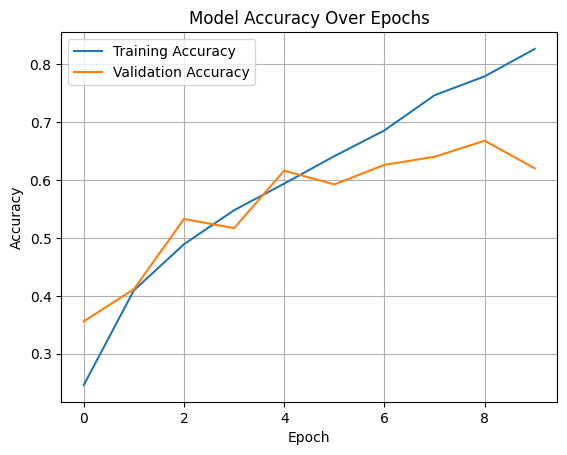

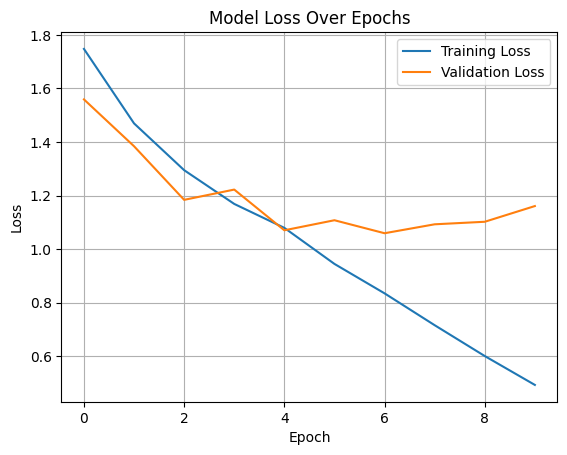

In [ ]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Testing the model

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cardboard.jpg to Cardboard.jpg


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

for file_name in uploaded.keys():
    # Load and preprocess image
    img = image.load_img(file_name, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict
    pred = model.predict(img_array)
    class_index = np.argmax(pred[0])
    class_labels = list(train_gen.class_indices.keys())
    predicted_label = class_labels[class_index]

    print(f"✅ {file_name} → Predicted Class: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
✅ Cardboard.jpg → Predicted Class: cardboard


In [30]:
from google.colab import files
uploaded = files.upload()

Saving plastic.jpg to plastic.jpg


In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np

for file_name in uploaded.keys():
    # Load and preprocess image
    img = image.load_img(file_name, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict
    pred = model.predict(img_array)
    class_index = np.argmax(pred[0])
    class_labels = list(train_gen.class_indices.keys())
    predicted_label = class_labels[class_index]

    print(f"✅ {file_name} → Predicted Class: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
✅ plastic.jpg → Predicted Class: plastic


Saving the trained model

In [32]:
model.save("waste_classifier_model.h5")
print("✅ Model saved successfully!")

✅ Model saved successfully!
